In [2]:
!pip install timm inflect phonemizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.4/565.4 kB 21.7 MB/s eta 0:00:00


In [3]:
# Not install transformers because colab already install it

In [4]:
from transformers import pipeline
model = 'facebook/detr-resnet-50'
od_pipe = pipeline('object-detection', model=model)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [5]:
!wget https://www.nstda.or.th/sci2pub/wp-content/uploads/2024/07/cows-cover135.jpg  cow.png

--2025-10-06 13:16:40--  https://www.nstda.or.th/sci2pub/wp-content/uploads/2024/07/cows-cover135.jpg
Resolving www.nstda.or.th (www.nstda.or.th)... 43.209.92.162, 43.208.36.147
Connecting to www.nstda.or.th (www.nstda.or.th)|43.209.92.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 280496 (274K) [image/jpeg]
Saving to: ‘cows-cover135.jpg’

cows-cover135.jpg   100%[===================>] 273.92K   261KB/s    in 1.1s    

2025-10-06 13:16:43 (261 KB/s) - ‘cows-cover135.jpg’ saved [280496/280496]

--2025-10-06 13:16:43--  http://cow.png/
Resolving cow.png (cow.png)... failed: Name or service not known.
wget: unable to resolve host address ‘cow.png’
FINISHED --2025-10-06 13:16:43--
Total wall clock time: 2.6s
Downloaded: 1 files, 274K in 1.1s (261 KB/s)


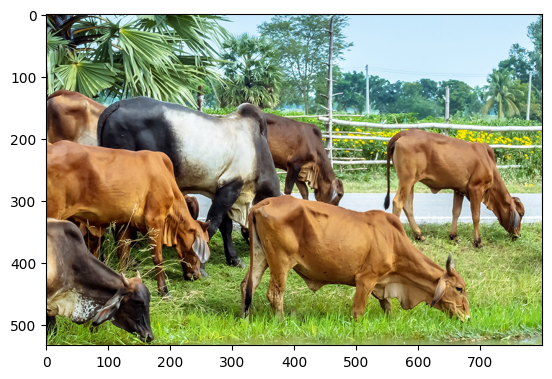

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('cows-cover135.jpg')
plt.imshow(image)
plt.show()

In [7]:
from PIL import Image
import requests
def load_image_from_url(url):
  return Image.open(requests.get(url, stream=True).raw)
# function for pull an image from internet with url

In [8]:
image_url = load_image_from_url("https://images.squarespace-cdn.com/content/v1/607f89e638219e13eee71b1e/1684821560422-SD5V37BAG28BURTLIXUQ/michael-sum-LEpfefQf4rU-unsplash.jpg")

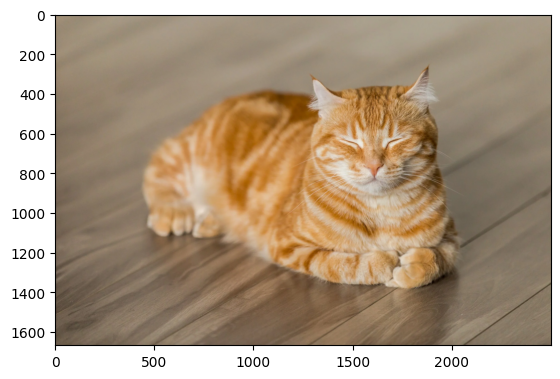

In [9]:
plt.imshow(image_url)
plt.show()

In [10]:
output = od_pipe(image)

In [11]:
output1 = od_pipe(image_url)

In [12]:
output

[{'score': 0.9959849119186401,
  'label': 'cow',
  'box': {'xmin': 0, 'ymin': 330, 'xmax': 175, 'ymax': 527}},
 {'score': 0.6470459699630737,
  'label': 'cow',
  'box': {'xmin': 79, 'ymin': 133, 'xmax': 475, 'ymax': 396}},
 {'score': 0.9611378908157349,
  'label': 'cow',
  'box': {'xmin': 0, 'ymin': 125, 'xmax': 97, 'ymax': 215}},
 {'score': 0.9693573117256165,
  'label': 'cow',
  'box': {'xmin': 344, 'ymin': 158, 'xmax': 479, 'ymax': 309}},
 {'score': 0.9826938509941101,
  'label': 'cow',
  'box': {'xmin': 80, 'ymin': 132, 'xmax': 377, 'ymax': 408}},
 {'score': 0.9955359697341919,
  'label': 'cow',
  'box': {'xmin': 0, 'ymin': 204, 'xmax': 266, 'ymax': 457}},
 {'score': 0.9988952875137329,
  'label': 'cow',
  'box': {'xmin': 312, 'ymin': 293, 'xmax': 684, 'ymax': 499}},
 {'score': 0.9979300498962402,
  'label': 'cow',
  'box': {'xmin': 543, 'ymin': 188, 'xmax': 775, 'ymax': 379}}]

In [13]:
# defined function for rendering image and crop the box with ai
import io
import matplotlib.pyplot as plt
def render_result_in_image(in_pil_img, in_result):
  plt.figure(figsize=(16,10))
  plt.imshow(in_pil_img)
  ax = plt.gca()
  # ดึงตำแหน้งของภาพออกมาเพื่อใช้ในการเพิ่มกรอบ ใส่ตัวอักษร
  for prediction in in_result:
    x,y = prediction['box']['xmin'], prediction['box']['ymin']
    w = prediction['box']['xmax'] - prediction['box']['xmin']
    h = prediction['box']['ymax'] - prediction['box']['ymin']

    ax.add_patch(plt.Rectangle((x,y),w,h,fill=False, color='red'))
    ax.text(x,y,prediction['label'] + ": " + str(round(prediction['score'],4)*100) + "%", color='red')
  plt.axis('off')

  img_buf = io.BytesIO()
  plt.savefig(img_buf, format='png', bbox_inches='tight', pad_inches=0)
  # หลังจาก savefig ตัวอ่านไฟล์ภาพจะชี้อยู่ที่ท้ายภาพ ซึ่งทำให้เวลาใช้ image.Open จะอ่านที่ท้ายภาพ
  # ทำให้หาภาพไม่เจอ
  img_buf.seek(0)
  # ย้าย cursor ไปที่จุดแรกสุดของภาพ ทำให้อ่านภาพได้ด้วย Image.open
  modiefied_image = Image.open(img_buf)
  plt.close()
  return modiefied_image


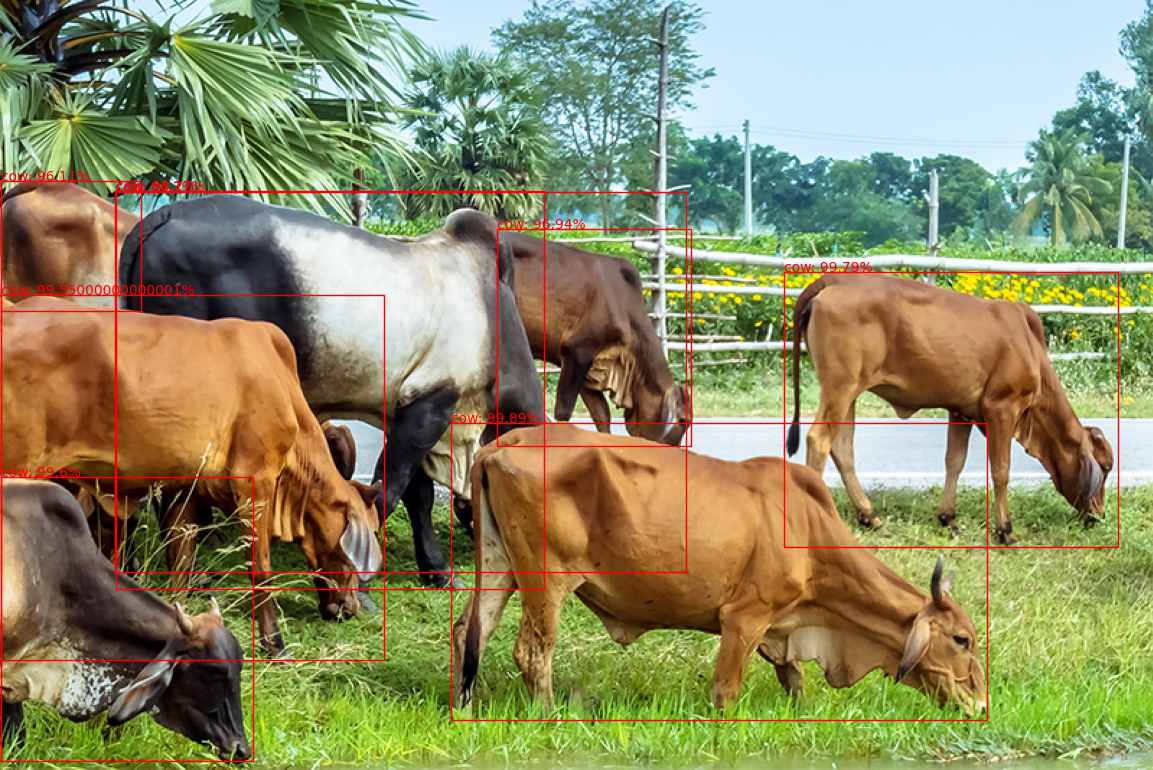

In [14]:
render_result_in_image(image, output)

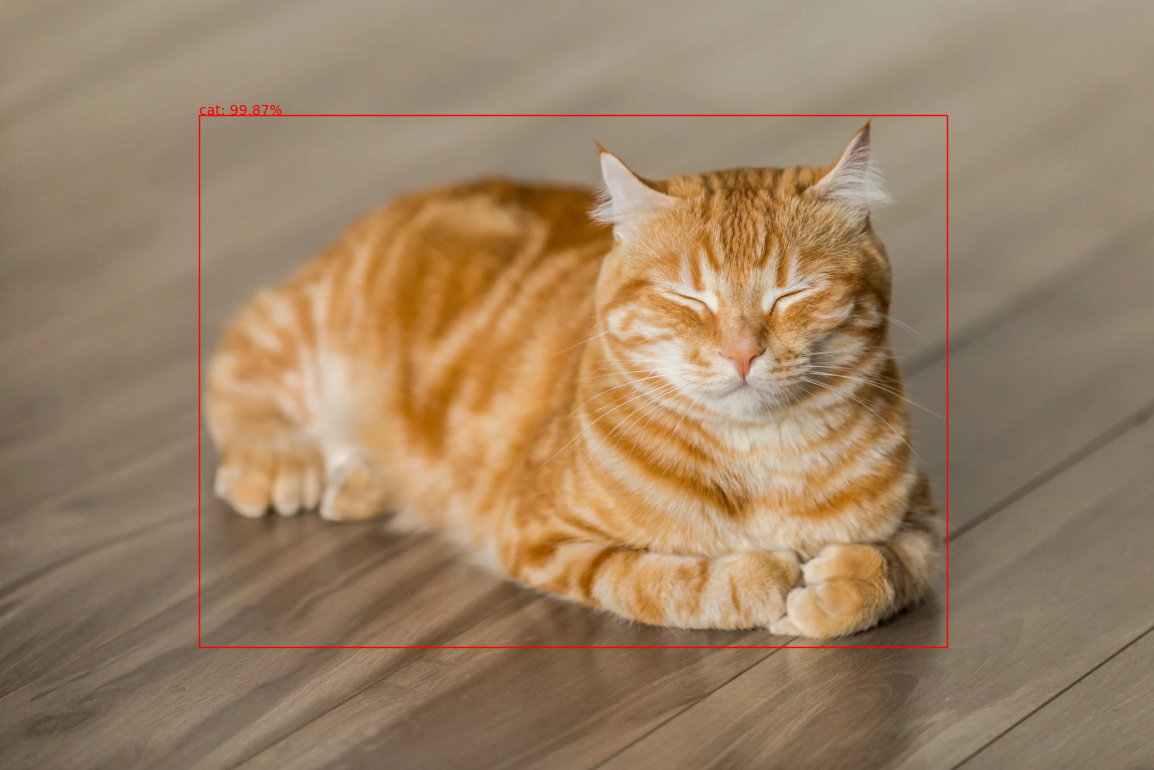

In [15]:
render_result_in_image(image_url, output1)

In [16]:
!wget https://www.alleycat.org/wp-content/uploads/2015/12/RS34996_BuenaVistaColony_1518.jpg cats.jpg

--2025-10-06 13:16:57--  https://www.alleycat.org/wp-content/uploads/2015/12/RS34996_BuenaVistaColony_1518.jpg
Resolving www.alleycat.org (www.alleycat.org)... 141.193.213.21, 141.193.213.20
Connecting to www.alleycat.org (www.alleycat.org)|141.193.213.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106251 (104K) [image/jpeg]
Saving to: ‘RS34996_BuenaVistaColony_1518.jpg’

RS34996_BuenaVistaC 100%[===================>] 103.76K  --.-KB/s    in 0.01s   

2025-10-06 13:16:57 (9.14 MB/s) - ‘RS34996_BuenaVistaColony_1518.jpg’ saved [106251/106251]

--2025-10-06 13:16:57--  http://cats.jpg/
Resolving cats.jpg (cats.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘cats.jpg’
FINISHED --2025-10-06 13:16:57--
Total wall clock time: 0.2s
Downloaded: 1 files, 104K in 0.01s (9.14 MB/s)


In [20]:
image_2 = Image.open('cats.jpg')

In [21]:
output3 = od_pipe(image_2)

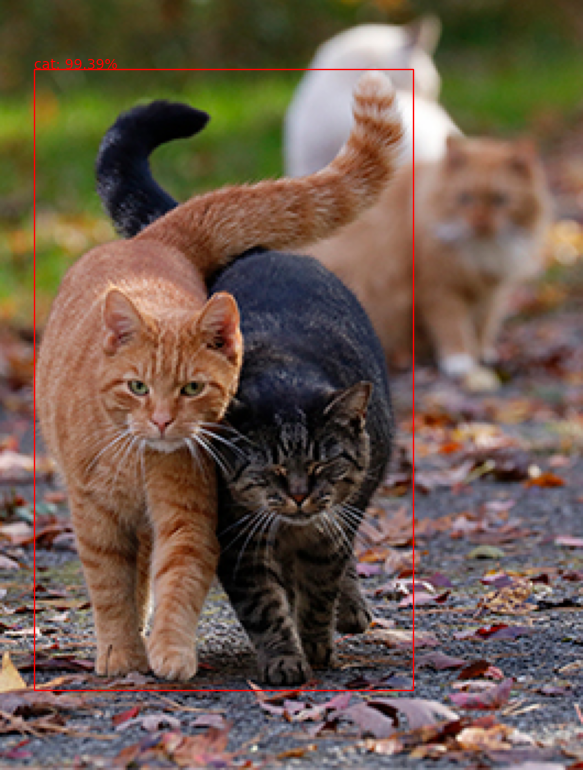

In [22]:
render_result_in_image(image_2, output3)

In [23]:
# dataset default ที่มักถูกใช้ในการ train object detection ก็คือ coco dataset

In [24]:
import inflect # lib ที่ใช้ในการทำ summarization จาก result ของ model

In [25]:
def summariza_prediction_nl(predictions):
  summary = {}
  p = inflect.engine()

  for prediction in predictions:
    label = prediction['label']
    if label in summary:
      summary[label] += 1
    else:
      summary[label] = 1
  result_string = "In this image, there are "
  for i, (label, count) in enumerate(summary.items()):
    count_string = p.number_to_words(count)
    result_string += count_string + " " + label
    if count > 1:
      result_string += "s"
    result_string += " "
    if i == len(summary) -2:
      result_string += "and "
  result_string = result_string.rstrip(', ') + "."
  return result_string

In [26]:
!sudo apt-get update
!sudo  apt-get install espeak-ng
!pip install py-espeak-ng
# ติดตั้ง lib เพิ่มถ้าใช้ colab บน os ของ linux

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [27]:
model = 'kakao-enterprise/vits-ljs' #เป็น model สร้างเสียงพูดที่สามรถพูดได้อย่างเป็นธรรมชาติ
# จากข้อความที่ป้อนให้
text_to_speech = pipeline('text-to-speech',model=model)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

Device set to use cpu


In [29]:
text = summariza_prediction_nl(output)
print(text)

In this image, there are eight cows.


In [33]:
display_sound = text_to_speech(text)
display_sound

{'audio': array([[-0.00020193, -0.00017889, -0.00051165, ..., -0.00056295,
         -0.00044425, -0.00072082]], dtype=float32),
 'sampling_rate': 22050}

In [34]:
from IPython.display import Audio as IPythonAudio

In [35]:
IPythonAudio(display_sound['audio'][0], rate=display_sound['sampling_rate'])

In [37]:
text = summariza_prediction_nl(output1)
print(text)

In this image, there are one cat.


In [38]:
display_sound = text_to_speech(text)
IPythonAudio(display_sound['audio'][0], rate=display_sound['sampling_rate'])

In [39]:
text = summariza_prediction_nl(output3)
print(text)

In this image, there are one cat.


In [41]:
display_sound = text_to_speech(text)
IPythonAudio(display_sound['audio'][0], rate=display_sound['sampling_rate'])
# แต่ในรูปมีสามตัว